---
title: "Decades Classification"
subtitle: "DSAN 5300 Final Project"
authors: ["Jorge Bris Moreno", "William McGloin", "Kangheng Liu", "Isfar Baset"]
date: last-modified
date-format: long
format:
  html:
    self-contained: true
    toc: true
    code-overflow: wrap
    code-fold: true
---

# Decades

In [16]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# Delete row with decade column == 1940s
tracks = tracks[tracks['decade'] != '1940s']

# what does that data look like? 
tracks.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,decade,key,mode
0,0.787,0.889,-3.125,0.1280,0.009510,0.000322,0.6520,0.677,156.027,4,172399,2020s,2,1
1,0.759,0.833,-5.010,0.0779,0.000260,0.057300,0.1780,0.522,140.026,4,183919,2020s,11,1
2,0.840,0.934,-3.717,0.1190,0.048400,0.000000,0.0961,0.670,149.994,4,145842,2020s,0,1
3,0.894,0.767,-4.695,0.1370,0.023100,0.000024,0.5740,0.412,144.077,4,140288,2020s,10,0
4,0.780,0.780,-2.857,0.0858,0.001470,0.000000,0.4720,0.446,118.014,4,177289,2020s,0,1
5,0.683,0.969,-3.290,0.1710,0.000275,0.126000,0.9400,0.595,170.017,4,226932,2020s,0,1
6,0.655,0.782,-6.825,0.3920,0.010500,0.003670,0.1200,0.372,167.003,4,164723,2020s,8,1
7,0.550,0.762,-7.861,0.3200,0.010900,0.001790,0.3980,0.347,200.211,4,162138,2020s,0,1
8,0.877,0.826,-3.750,0.2060,0.122000,0.000010,0.1040,0.814,75.003,4,238145,2020s,10,0
9,0.752,0.807,-4.386,0.1720,0.014600,0.000376,0.8000,0.442,87.507,4,195994,2020s,11,1


In [17]:
tracks['decade'].value_counts()

decade
2010s    18863
2020s    14510
2000s     7590
1990s     4637
1960s     3738
1970s     3241
1980s     2519
1950s     1159
Name: count, dtype: int64

In [18]:
decades = tracks

## EDA

In [19]:
# save tracks as df to avoid overwriting
df = tracks[:]

# remove the s from the end of each decade
df['decade'] = df['decade'].str.replace('s', '')

# convert decade into an integer
df['decade'] = df['decade'].astype(int)

<Axes: >

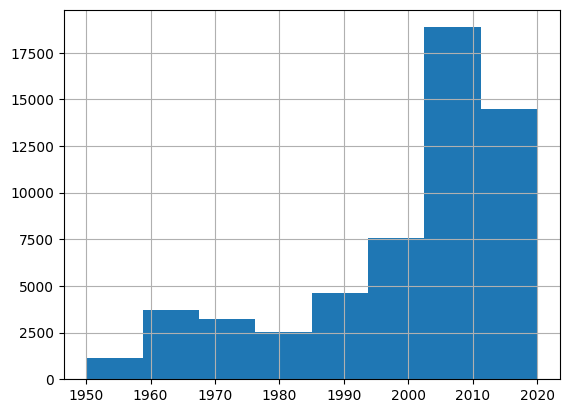

In [20]:
# histogram of decades (width of 10 years)
df['decade'].hist(bins=8)

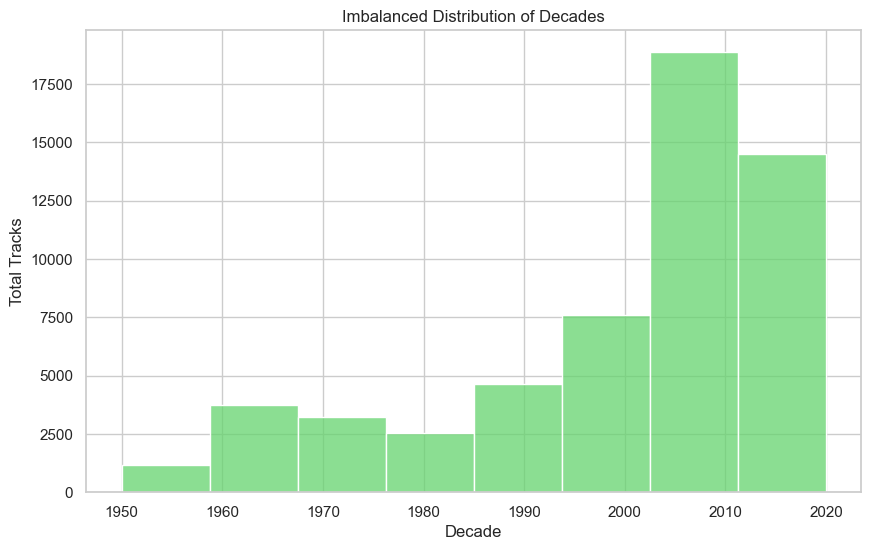

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a normalized RGB tuple for the specified color
rgb_color_hist = (101/255, 212/255, 110/255)

# Set the style of the axes and the background color
sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

# Initialize the matplotlib figure
plt.figure(figsize=(10, 6))

# Create a histogram with the 'decade' data
# Let's assume the decade data ranges from 1950 to 2020, divided into 8 bins
sns.histplot(df['decade'], bins=8, color=rgb_color_hist)

# Set the title and labels
plt.title("Imbalanced Distribution of Decades")
plt.xlabel("Decade")
plt.ylabel("Total Tracks")

# Set the background of the plot to be transparent
plt.gca().patch.set_alpha(0.0)

# Show the plot
plt.show()

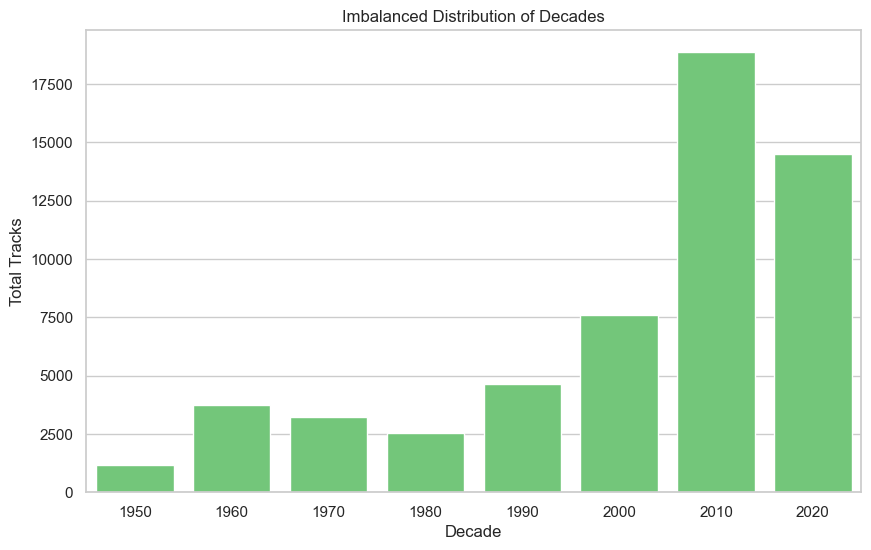

In [30]:
# Let's create a histogram where each bar is centered over the decade label.
# We'll create bin edges that are centered on the decades.

# Define the decades and their corresponding counts from the provided information
decades = [1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]
counts = [1159, 3738, 3241, 2519, 4637, 7590, 18863, 14510]

# Create a DataFrame from the decades and counts
df_decades = pd.DataFrame({'Decade': decades, 'Count': counts})

# Set the figure size and style
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the bar plot
sns.barplot(x='Decade', y='Count', data=df_decades, color=rgb_color_hist)

# Set the title and labels
plt.title("Imbalanced Distribution of Decades")
plt.xlabel("Decade")
plt.ylabel("Total Tracks")

# Set the background of the plot to be transparent
plt.gca().patch.set_alpha(0.0)

# save as png with transparent background
plt.savefig('../images/decade_distribution.png', transparent=True)

# Show the plot
plt.show()


In [28]:
df['decade'].value_counts()

decade
2010    18863
2020    14510
2000     7590
1990     4637
1960     3738
1970     3241
1980     2519
1950     1159
Name: count, dtype: int64

In [5]:
# convert decade to categorical
tracks['decade'] = pd.Categorical(tracks['decade'])

## Classification Data Prep

In [89]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,decade,key,major
0,0.787,0.889,-3.125,0.1280,0.009510,0.000322,0.6520,0.677,156.027,4,172399,2020s,2,1
1,0.759,0.833,-5.010,0.0779,0.000260,0.057300,0.1780,0.522,140.026,4,183919,2020s,11,1
2,0.840,0.934,-3.717,0.1190,0.048400,0.000000,0.0961,0.670,149.994,4,145842,2020s,0,1
3,0.894,0.767,-4.695,0.1370,0.023100,0.000024,0.5740,0.412,144.077,4,140288,2020s,10,0
4,0.780,0.780,-2.857,0.0858,0.001470,0.000000,0.4720,0.446,118.014,4,177289,2020s,0,1
5,0.683,0.969,-3.290,0.1710,0.000275,0.126000,0.9400,0.595,170.017,4,226932,2020s,0,1
6,0.655,0.782,-6.825,0.3920,0.010500,0.003670,0.1200,0.372,167.003,4,164723,2020s,8,1
7,0.550,0.762,-7.861,0.3200,0.010900,0.001790,0.3980,0.347,200.211,4,162138,2020s,0,1
8,0.877,0.826,-3.750,0.2060,0.122000,0.000010,0.1040,0.814,75.003,4,238145,2020s,10,0
9,0.752,0.807,-4.386,0.1720,0.014600,0.000376,0.8000,0.442,87.507,4,195994,2020s,11,1


In [90]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,decade,key,major
0,0.798174,0.889,0.926877,0.132368,0.009548,0.000323,0.657921,0.677,0.642179,0.8,0.035570,2020s,2,1
1,0.769777,0.833,0.896157,0.080558,0.000261,0.057415,0.179617,0.522,0.576322,0.8,0.038003,2020s,11,1
2,0.851927,0.934,0.917229,0.123061,0.048594,0.000000,0.096973,0.670,0.617348,0.8,0.029960,2020s,0,1
3,0.906694,0.767,0.901291,0.141675,0.023193,0.000024,0.579213,0.412,0.592995,0.8,0.028787,2020s,10,0
4,0.791075,0.780,0.931244,0.088728,0.001476,0.000000,0.476287,0.446,0.485724,0.8,0.036603,2020s,0,1
5,0.692698,0.969,0.924188,0.176836,0.000276,0.126253,0.948537,0.595,0.699759,0.8,0.047089,2020s,0,1
6,0.664300,0.782,0.866579,0.405377,0.010542,0.003677,0.121090,0.372,0.687354,0.8,0.033948,2020s,8,1
7,0.557809,0.762,0.849695,0.330920,0.010944,0.001794,0.401615,0.347,0.824032,0.8,0.033402,2020s,0,1
8,0.889452,0.826,0.916691,0.213030,0.122490,0.000011,0.104945,0.814,0.308699,0.8,0.049458,2020s,10,0
9,0.762677,0.807,0.906326,0.177870,0.014659,0.000377,0.807265,0.442,0.360163,0.8,0.040554,2020s,11,1


In [91]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (45005, 13) 
Shape of X_test:  (11252, 13) 
Shape of y_train:  (45005, 1) 
Shape of y_test:  (11252, 1)


In [92]:
train['decade'].value_counts()

decade
2010s    15094
2020s    11600
2000s     6064
1990s     3752
1960s     2960
1970s     2586
1980s     2009
1950s      940
Name: count, dtype: int64

In [93]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().min())

for decade_value, group in train_df.groupby('decade'):
    resampled_group = resample(group,
                               replace=False,
                               n_samples=min_class_size,
                               random_state=137)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['decade'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
decade
1950s    940
1960s    940
1970s    940
1980s    940
1990s    940
2000s    940
2010s    940
2020s    940
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


In [94]:
X_train = balanced_train_df.drop(['decade'], axis=1)
y_train = balanced_train_df[['decade']]

In [95]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
1950s    940
1960s    940
1970s    940
1980s    940
1990s    940
2000s    940
2010s    940
2020s    940
Name: count, dtype: int64

In [96]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
2010s    3769
2020s    2910
2000s    1526
1990s     885
1960s     778
1970s     655
1980s     510
1950s     219
Name: count, dtype: int64

In [97]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

## Logistic Regression using OVR

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 10000.0, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.3103448275862069
Classification Report:
              precision    recall  f1-score   support

       1950s       0.10      0.68      0.18       219
       1960s       0.35      0.33      0.34       778
       1970s       0.20      0.15      0.17       655
       1980s       0.19      0.49      0.27       510
       1990s       0.19      0.12      0.14       885
       2000s       0.25      0.39      0.30      1526
       2010s       0.49      0.22      0.30      3769
       2020s       0.47      0.42      0.44      2910

    accuracy                           0.31     11252
   macro avg       0.28      0.35      0.27     11252
weighted avg       0.38      0.31      0.32     11252



Text(0.5, 1.0, 'Training Confusion Matrix')

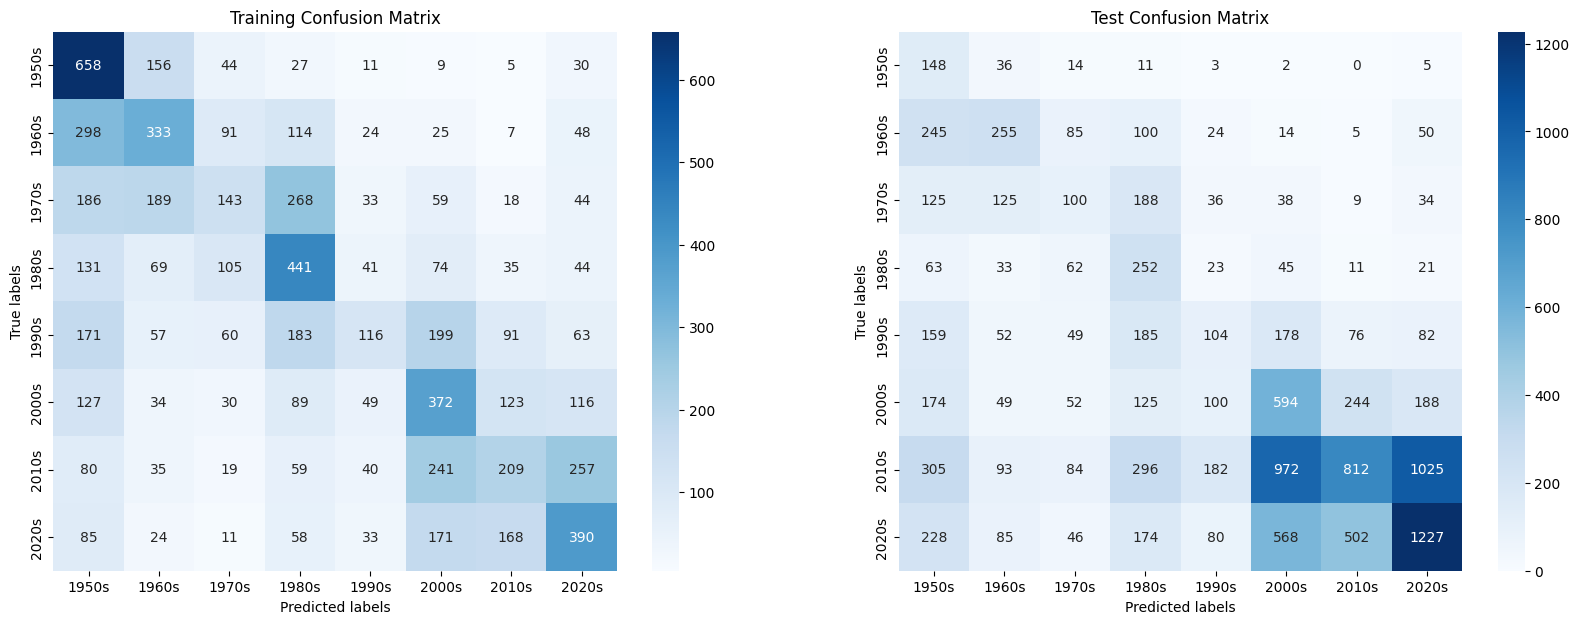

In [99]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [100]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 545.5594781168514, 'gamma': 'scale', 'kernel': 'rbf'}
Test Accuracy: 0.29941343761109135
SVM Classification Report:
              precision    recall  f1-score   support

       1950s       0.11      0.67      0.19       219
       1960s       0.27      0.36      0.31       778
       1970s       0.19      0.26      0.22       655
       1980s       0.24      0.43      0.31       510
       1990s       0.18      0.17      0.18       885
       2000s       0.24      0.33      0.28      1526
       2010s       0.47      0.24      0.32      3769
       2020s       0.46      0.34      0.39      2910

    accuracy                           0.30     11252
   macro avg       0.27      0.35      0.27     11252
weighted avg       0.36      0.30      0.31     11252



Text(0.5, 1.0, 'Training Confusion Matrix')

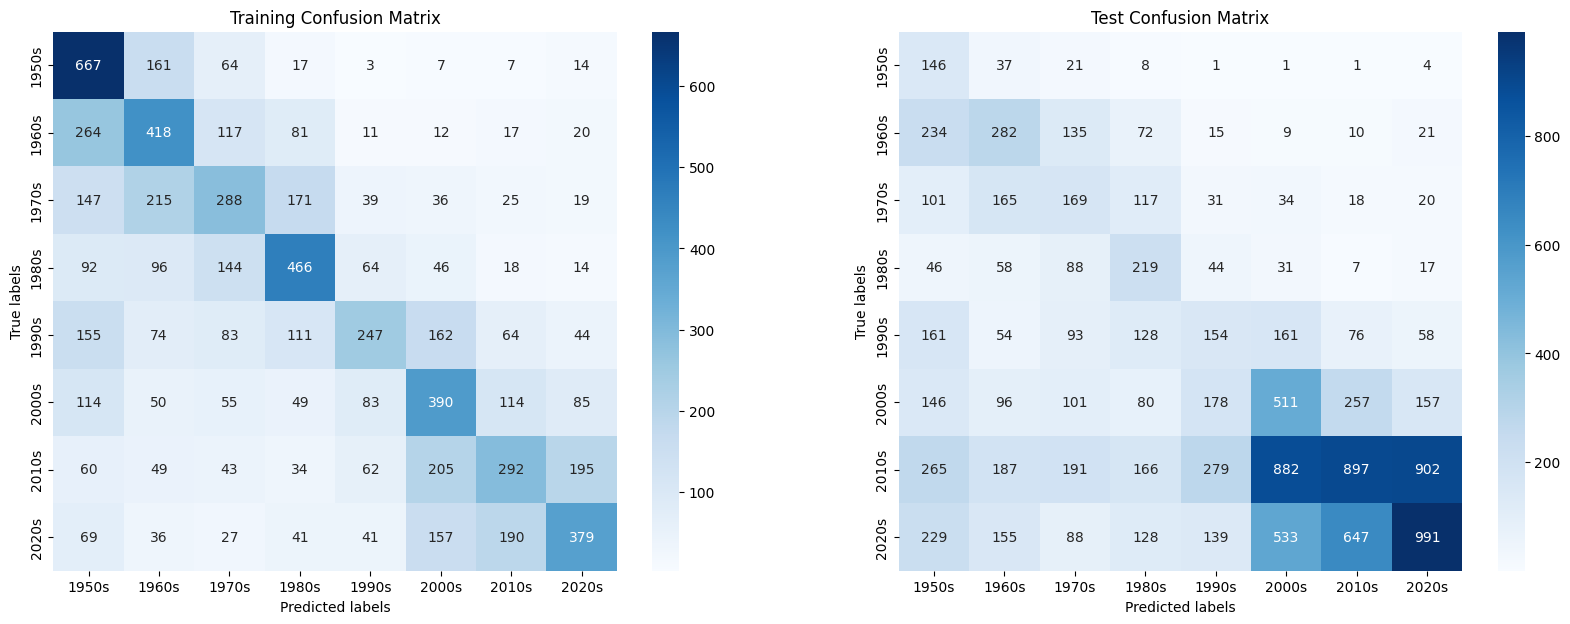

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(8, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [2, 3, 4],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


In [103]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.337234 using {'batch_size': 64, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 64, 'dropout_rate': 0.05, 'epochs': 50, 'hidden_layers': 2, 'neurons': 128, 'regularization_rate': 0.001}


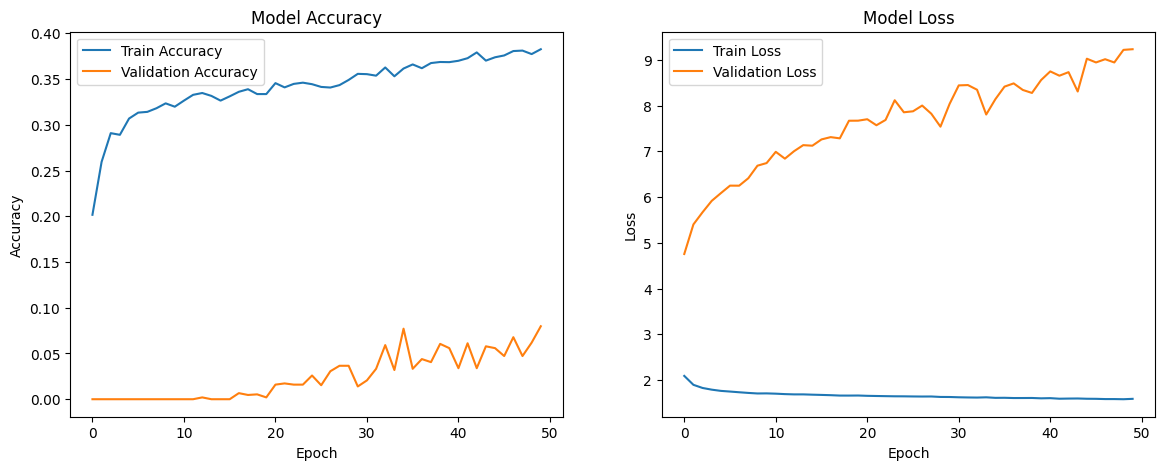

In [104]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [105]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.2205830067396164


## Random Forest

In [106]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [107]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 40, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Test Accuracy: 0.378510487024529
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.14      0.76      0.24       219
           1       0.34      0.44      0.38       778
           2       0.28      0.37      0.32       655
           3       0.27      0.47      0.34       510
           4       0.28      0.25      0.27       885
           5       0.29      0.37      0.33      1526
           6       0.55      0.31      0.40      3769
           7       0.54      0.44      0.49      2910

    accuracy                           0.38     11252
   macro avg       0.34      0.43      0.35     11252
weighted avg       0.44      0.38      0.39     11252



Text(0.5, 1.0, 'Training Confusion Matrix')

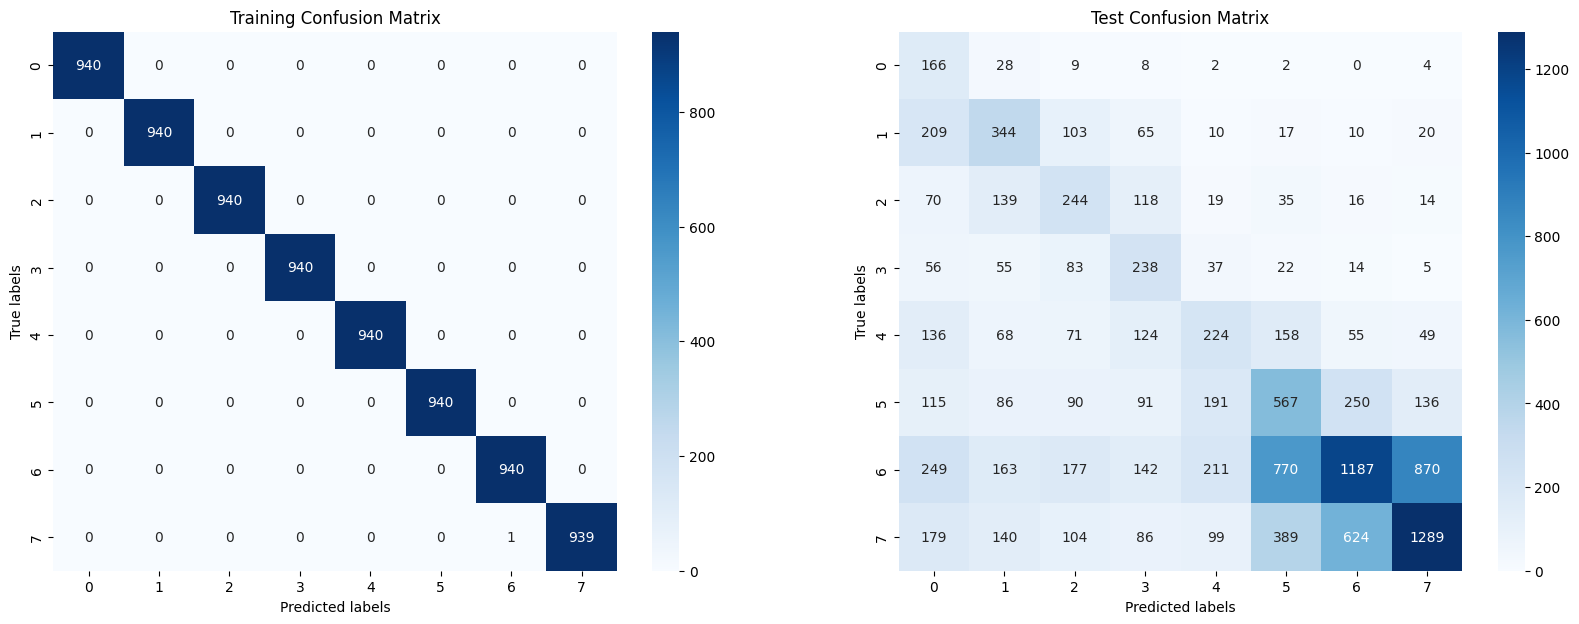

In [108]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


## XGBoost 

In [109]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [110]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=8,
              num_parallel_tree=None, ...)

In [111]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.37619978670458587
Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.69      0.24       219
           1       0.33      0.39      0.36       778
           2       0.25      0.35      0.29       655
           3       0.28      0.49      0.36       510
           4       0.27      0.27      0.27       885
           5       0.30      0.36      0.33      1526
           6       0.53      0.33      0.41      3769
           7       0.52      0.44      0.48      2910

    accuracy                           0.38     11252
   macro avg       0.33      0.41      0.34     11252
weighted avg       0.43      0.38      0.39     11252



In [112]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.4s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.8s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.7s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [113]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)


Test Set Accuracy: 0.37237824386775686
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.14      0.68      0.23       219
           1       0.32      0.40      0.36       778
           2       0.24      0.33      0.28       655
           3       0.28      0.48      0.35       510
           4       0.27      0.25      0.26       885
           5       0.29      0.36      0.32      1526
           6       0.54      0.33      0.41      3769
           7       0.53      0.44      0.48      2910

    accuracy                           0.37     11252
   macro avg       0.32      0.41      0.33     11252
weighted avg       0.43      0.37      0.38     11252



## Comparison of the models -> inc. 1950s

- Logistic Regression
    - Test Accuracy: 0.3103448275862069
    - Time: 3m 57.9s
- SVM
    - Test Accuracy: 0.29941343761109135
    - Time: 16m 48.9s
- Neural Network
    - Train Accuracy: 0.337234
    - Test Accuracy: 0.2205830067396164
    - Time: 9m 49.3s
- Random Forest
    - Test Accuracy: 0.378510487024529
    - Time: 18m 16.1s
- XGBoost
    - Test Accuracy: 0.37237824386775686
    - Time: 2m 27.7s

# Decades (not inc. 1950s)

In [114]:
# import relevant libraries
import numpy as np
import pandas as pd

# load in the data
tracks = pd.read_csv('../data/clean_data/tracks.csv')

# drop columns that will not be used in our models for obvious reasons 
tracks = tracks.drop(['artist_name', 'artist_id', 'album_id', 'album_release_year', 'track_id', 'track_name', 'album_name'], axis=1)

# split 'key_mode' column
tracks['key'] = tracks['key_mode'].apply(lambda x: x.split(' ')[0])
tracks['mode'] = tracks['key_mode'].apply(lambda x: x.split(' ')[1])

# drop key_mode
tracks.drop('key_mode', axis=1, inplace=True)
# covert mode into binary
tracks['mode'] = tracks['mode'].apply(lambda x: 1 if x == 'major' else 0)

# convert key into numerical
key_dict = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
tracks['key'] = tracks['key'].apply(lambda x: key_dict[x])

# Delete row with decade column == 1940s
tracks = tracks[tracks['decade'] != '1940s']

# Delete row with decade column == 1950s
tracks = tracks[tracks['decade'] != '1950s']

# what does that data look like? 
tracks.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,decade,key,mode
0,0.787,0.889,-3.125,0.1280,0.009510,0.000322,0.6520,0.677,156.027,4,172399,2020s,2,1
1,0.759,0.833,-5.010,0.0779,0.000260,0.057300,0.1780,0.522,140.026,4,183919,2020s,11,1
2,0.840,0.934,-3.717,0.1190,0.048400,0.000000,0.0961,0.670,149.994,4,145842,2020s,0,1
3,0.894,0.767,-4.695,0.1370,0.023100,0.000024,0.5740,0.412,144.077,4,140288,2020s,10,0
4,0.780,0.780,-2.857,0.0858,0.001470,0.000000,0.4720,0.446,118.014,4,177289,2020s,0,1
5,0.683,0.969,-3.290,0.1710,0.000275,0.126000,0.9400,0.595,170.017,4,226932,2020s,0,1
6,0.655,0.782,-6.825,0.3920,0.010500,0.003670,0.1200,0.372,167.003,4,164723,2020s,8,1
7,0.550,0.762,-7.861,0.3200,0.010900,0.001790,0.3980,0.347,200.211,4,162138,2020s,0,1
8,0.877,0.826,-3.750,0.2060,0.122000,0.000010,0.1040,0.814,75.003,4,238145,2020s,10,0
9,0.752,0.807,-4.386,0.1720,0.014600,0.000376,0.8000,0.442,87.507,4,195994,2020s,11,1


In [115]:
tracks['decade'].value_counts()

decade
2010s    18863
2020s    14510
2000s     7590
1990s     4637
1960s     3738
1970s     3241
1980s     2519
Name: count, dtype: int64

In [116]:
decades = tracks

## Classification Data Prep

In [117]:
# convert key and mode to factors
decades['key'] = decades['key'].astype('category')
decades['mode'] = decades['mode'].astype('category')

# rename mode to major
decades.rename(columns={'mode': 'major'}, inplace=True)

# what does the data look like now?
decades.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,decade,key,major
0,0.787,0.889,-3.125,0.1280,0.009510,0.000322,0.6520,0.677,156.027,4,172399,2020s,2,1
1,0.759,0.833,-5.010,0.0779,0.000260,0.057300,0.1780,0.522,140.026,4,183919,2020s,11,1
2,0.840,0.934,-3.717,0.1190,0.048400,0.000000,0.0961,0.670,149.994,4,145842,2020s,0,1
3,0.894,0.767,-4.695,0.1370,0.023100,0.000024,0.5740,0.412,144.077,4,140288,2020s,10,0
4,0.780,0.780,-2.857,0.0858,0.001470,0.000000,0.4720,0.446,118.014,4,177289,2020s,0,1
5,0.683,0.969,-3.290,0.1710,0.000275,0.126000,0.9400,0.595,170.017,4,226932,2020s,0,1
6,0.655,0.782,-6.825,0.3920,0.010500,0.003670,0.1200,0.372,167.003,4,164723,2020s,8,1
7,0.550,0.762,-7.861,0.3200,0.010900,0.001790,0.3980,0.347,200.211,4,162138,2020s,0,1
8,0.877,0.826,-3.750,0.2060,0.122000,0.000010,0.1040,0.814,75.003,4,238145,2020s,10,0
9,0.752,0.807,-4.386,0.1720,0.014600,0.000376,0.8000,0.442,87.507,4,195994,2020s,11,1


In [118]:
# find all numerical columns and normalize the numerical columns into a bracket from [0,1]
numerical_columns = decades.select_dtypes(include=[np.number]).columns
decades[numerical_columns] = (decades[numerical_columns] - decades[numerical_columns].min()) / (decades[numerical_columns].max() - decades[numerical_columns].min())

# what does the data look like now?
decades.head(20)

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms,decade,key,major
0,0.798174,0.889,0.926877,0.132368,0.009548,0.000323,0.657921,0.677,0.642179,0.8,0.035570,2020s,2,1
1,0.769777,0.833,0.896157,0.080558,0.000261,0.057415,0.179617,0.522,0.576322,0.8,0.038003,2020s,11,1
2,0.851927,0.934,0.917229,0.123061,0.048594,0.000000,0.096973,0.670,0.617348,0.8,0.029960,2020s,0,1
3,0.906694,0.767,0.901291,0.141675,0.023193,0.000024,0.579213,0.412,0.592995,0.8,0.028787,2020s,10,0
4,0.791075,0.780,0.931244,0.088728,0.001476,0.000000,0.476287,0.446,0.485724,0.8,0.036603,2020s,0,1
5,0.692698,0.969,0.924188,0.176836,0.000276,0.126253,0.948537,0.595,0.699759,0.8,0.047089,2020s,0,1
6,0.664300,0.782,0.866579,0.405377,0.010542,0.003677,0.121090,0.372,0.687354,0.8,0.033948,2020s,8,1
7,0.557809,0.762,0.849695,0.330920,0.010944,0.001794,0.401615,0.347,0.824032,0.8,0.033402,2020s,0,1
8,0.889452,0.826,0.916691,0.213030,0.122490,0.000011,0.104945,0.814,0.308699,0.8,0.049458,2020s,10,0
9,0.762677,0.807,0.906326,0.177870,0.014659,0.000377,0.807265,0.442,0.360163,0.8,0.040554,2020s,11,1


In [119]:
# split the data into training and testing sets, with 80% of the data for training and 20% for testing
from sklearn.model_selection import train_test_split

train, test = train_test_split(decades, test_size=0.2, random_state=37)

# split the data into features and target, target being three columns ['genre1','genre2','genre3']
X_train = train.drop(['decade'], axis=1)
y_train = train[['decade']]
X_test = test.drop(['decade'], axis=1)
y_test = test[['decade']]

print("Shape of X_train: ", X_train.shape, "\nShape of X_test: ", X_test.shape, "\nShape of y_train: ", y_train.shape, "\nShape of y_test: ", y_test.shape)

Shape of X_train:  (44078, 13) 
Shape of X_test:  (11020, 13) 
Shape of y_train:  (44078, 1) 
Shape of y_test:  (11020, 1)


In [120]:
train['decade'].value_counts()

decade
2010s    15035
2020s    11673
2000s     6122
1990s     3674
1960s     2999
1970s     2552
1980s     2023
Name: count, dtype: int64

In [121]:
from sklearn.utils import resample

# Combine the features and target for training set
train_df = pd.concat([X_train, y_train], axis=1)

# sample the training dataset classes
resampled_df_list = []
min_class_size = int(y_train.value_counts().min())

for decade_value, group in train_df.groupby('decade'):
    resampled_group = resample(group,
                               replace=False,
                               n_samples=min_class_size,
                               random_state=137)
    resampled_df_list.append(resampled_group)

# Combine the resampled training dataframes
balanced_train_df = pd.concat(resampled_df_list)

# Print the new class distribution
print("New class distribution after resampling:")
print(balanced_train_df['decade'].value_counts())
print("Balanced dataset created and saved successfully without using SMOTE.")

New class distribution after resampling:
decade
1960s    2023
1970s    2023
1980s    2023
1990s    2023
2000s    2023
2010s    2023
2020s    2023
Name: count, dtype: int64
Balanced dataset created and saved successfully without using SMOTE.


In [122]:
X_train = balanced_train_df.drop(['decade'], axis=1)
y_train = balanced_train_df[['decade']]

In [123]:
# value counts of genre in the training data
y_train['decade'].value_counts()

decade
1960s    2023
1970s    2023
1980s    2023
1990s    2023
2000s    2023
2010s    2023
2020s    2023
Name: count, dtype: int64

In [124]:
# value counts of genre in test data
y_test['decade'].value_counts()

decade
2010s    3828
2020s    2837
2000s    1468
1990s     963
1960s     739
1970s     689
1980s     496
Name: count, dtype: int64

In [125]:
from sklearn.preprocessing import LabelEncoder

# Encode target labels
label_encoder = LabelEncoder()
train_target_encoded = label_encoder.fit_transform(y_train)
test_target_encoded = label_encoder.fit_transform(y_test)

## Logistic Regression using OVR

In [126]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Flatten the target arrays to avoid DataConversionWarnings
y_train_flat = y_train.values.ravel() if hasattr(y_train, 'values') else y_train.ravel()
y_test_flat = y_test.values.ravel() if hasattr(y_test, 'values') else y_test.ravel()

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],  # Adding the solver here for completeness
    'max_iter': [10000]  # Increase max_iter to avoid convergence warnings
}

# Initialize the Logistic Regression model
log_reg_ovr = LogisticRegression(multi_class='ovr')

# Create GridSearchCV with the logistic regression estimator and the parameter grid
grid_search = GridSearchCV(log_reg_ovr, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search.fit(X_train, y_train_flat)

# Get the best model
best_model = grid_search.best_estimator_

# Predict on the test data with the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model on the test data
accuracy = accuracy_score(y_test_flat, y_pred)
classification_report_result = classification_report(y_test_flat, y_pred)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy}")
print("Classification Report:")
print(classification_report_result)

Best Parameters: {'C': 4.281332398719396, 'max_iter': 10000, 'penalty': 'l1', 'solver': 'liblinear'}
Test Accuracy: 0.31887477313974594
Classification Report:
              precision    recall  f1-score   support

       1960s       0.24      0.61      0.35       739
       1970s       0.22      0.16      0.19       689
       1980s       0.18      0.47      0.26       496
       1990s       0.21      0.12      0.15       963
       2000s       0.23      0.40      0.29      1468
       2010s       0.51      0.17      0.25      3828
       2020s       0.46      0.49      0.47      2837

    accuracy                           0.32     11020
   macro avg       0.29      0.34      0.28     11020
weighted avg       0.38      0.32      0.31     11020



Text(0.5, 1.0, 'Training Confusion Matrix')

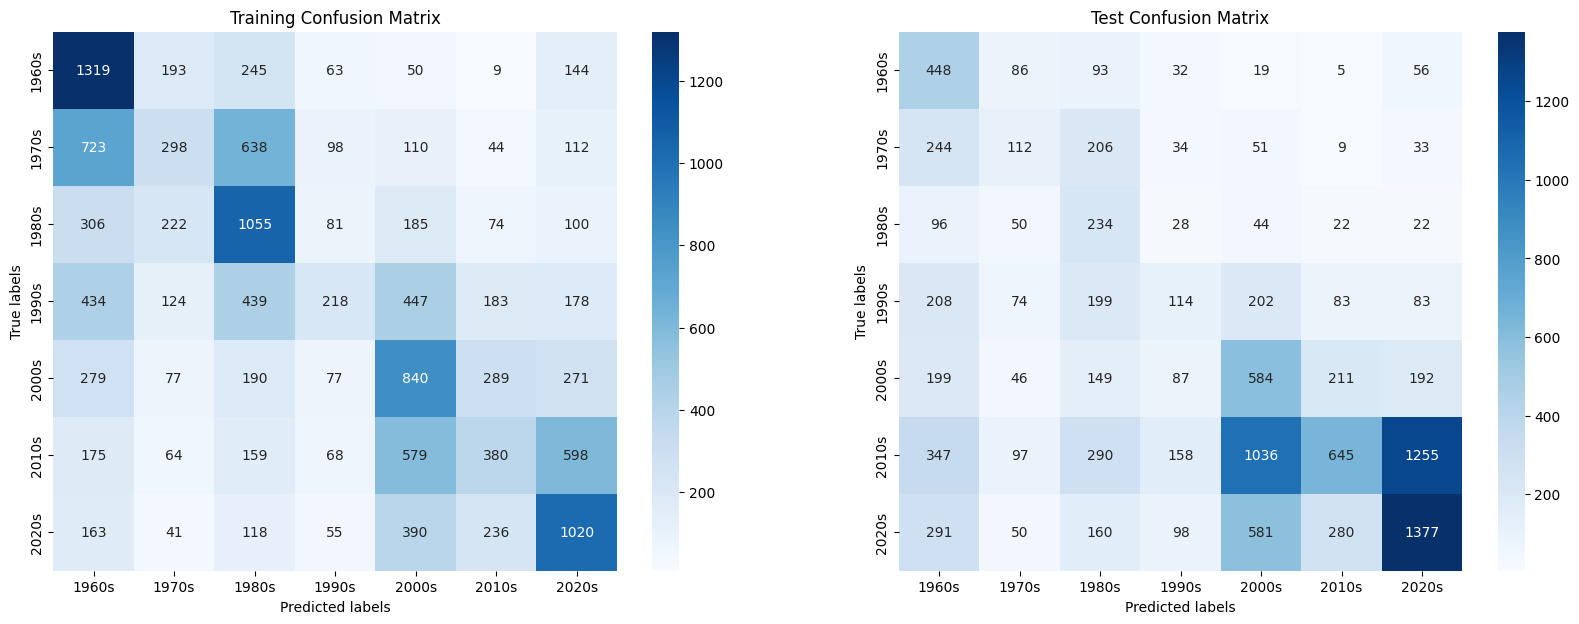

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_train = best_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## SVM

In [128]:
from sklearn.svm import SVC
import warnings
warnings.filterwarnings('ignore')

# Define the parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Added different kernels to try
    'gamma': ['scale', 'auto']  # Gamma is a parameter for non-linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set
}

# Initialize the SVM model
svm_model = SVC(max_iter=10000, decision_function_shape='ovr')

# Create GridSearchCV with the SVM estimator and the parameter grid
grid_search_svm = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_svm.fit(X_train, y_train_flat)

# Get the best model
best_svm_model = grid_search_svm.best_estimator_

# Predict on the test data with the best model
y_pred_svm = best_svm_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_svm = accuracy_score(y_test_flat, y_pred_svm)
classification_report_svm = classification_report(y_test_flat, y_pred_svm)

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Test Accuracy: {accuracy_svm}")
print("SVM Classification Report:")
print(classification_report_svm)

Best Parameters: {'C': 206.913808111479, 'gamma': 'auto', 'kernel': 'rbf'}
Test Accuracy: 0.33212341197822143
SVM Classification Report:
              precision    recall  f1-score   support

       1960s       0.26      0.64      0.37       739
       1970s       0.18      0.24      0.21       689
       1980s       0.25      0.48      0.32       496
       1990s       0.23      0.23      0.23       963
       2000s       0.24      0.36      0.29      1468
       2010s       0.51      0.25      0.33      3828
       2020s       0.48      0.38      0.42      2837

    accuracy                           0.33     11020
   macro avg       0.31      0.37      0.31     11020
weighted avg       0.39      0.33      0.34     11020



Text(0.5, 1.0, 'Training Confusion Matrix')

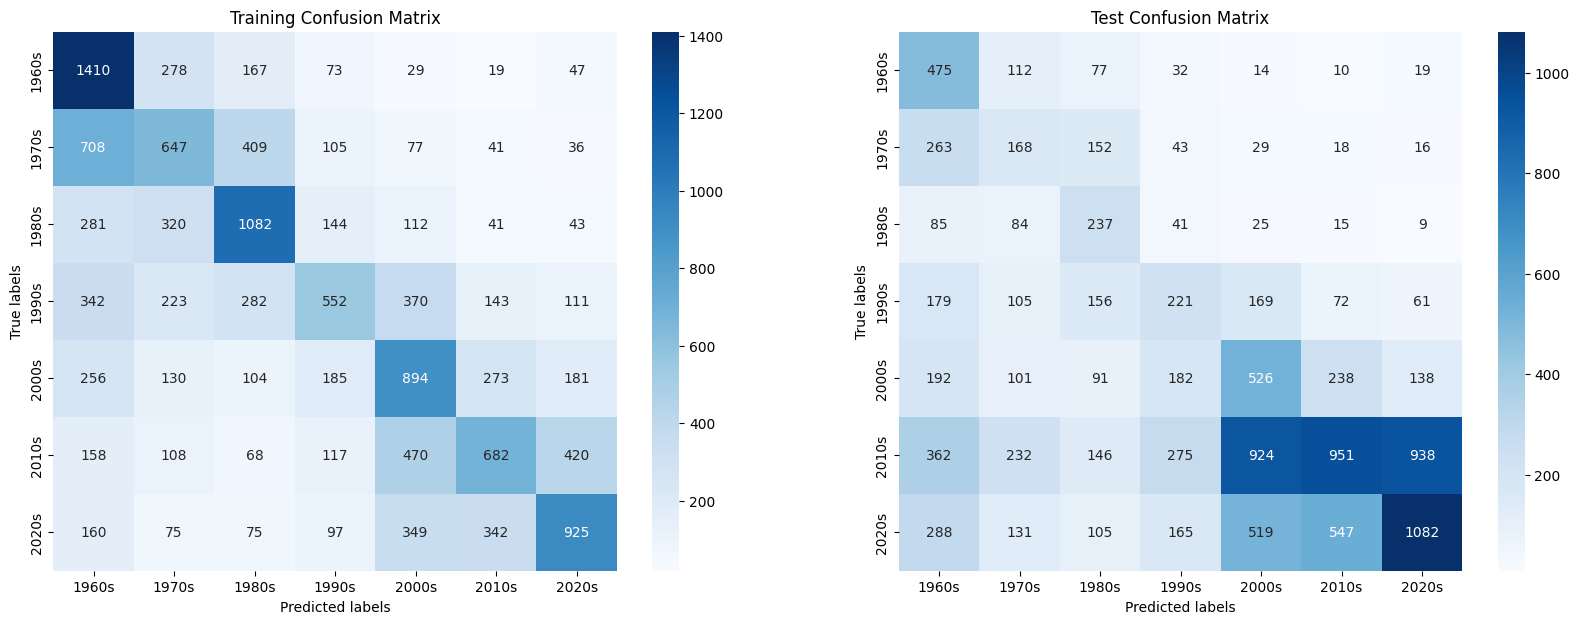

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# training predictions
y_pred_svm_train = best_svm_model.predict(X_train)

# train confusion matrix
cm_train = confusion_matrix(y_train, y_pred_svm_train)

# test confusion matrix
cm_test = confusion_matrix(y_test_flat, y_pred_svm)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(y_test_flat)), yticklabels=sorted(set(y_test_flat)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(y_train_flat)), yticklabels=sorted(set(y_train_flat)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')

## Neural Network

In [ ]:
import warnings
warnings.filterwarnings('ignore')

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import regularizers


from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV

def create_model(neurons=128, dropout_rate=0.05, regularization_rate=0.01, hidden_layers=1):
    model = Sequential()
    model.add(Dense(neurons, activation='relu', input_shape=(X_train.shape[1],), 
                    kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dropout(dropout_rate))
    for _ in range(hidden_layers - 1):
        model.add(Dense(neurons, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
        model.add(Dropout(dropout_rate))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(regularization_rate)))
    model.add(Dense(7, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

model = KerasClassifier(model=create_model, verbose=1, neurons=None, dropout_rate=None, regularization_rate=None, hidden_layers=None, batch_size=None, epochs=None)

param_grid = {
    'neurons': [64, 128],
    'dropout_rate': [0.05, 0.1, 0.2],
    'regularization_rate': [0.01, 0.001],
    'hidden_layers': [2, 3, 4],
    'batch_size': [32, 64, 128],
    'epochs': [50]
}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
grid_result = grid.fit(X_train, train_target_encoded)


In [131]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.365863 using {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 64, 'regularization_rate': 0.001}


Best parameters found:  {'batch_size': 32, 'dropout_rate': 0.1, 'epochs': 50, 'hidden_layers': 2, 'neurons': 64, 'regularization_rate': 0.001}


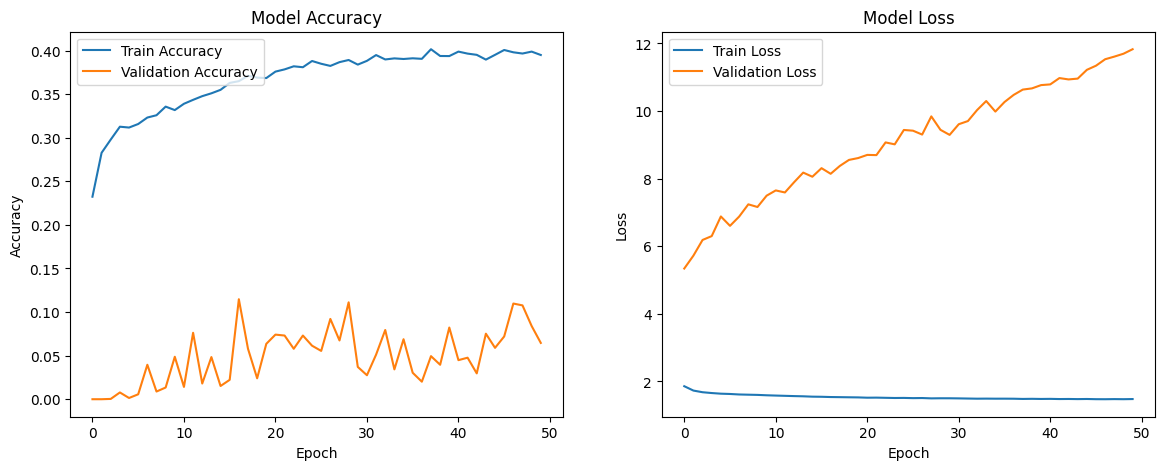

In [132]:
import matplotlib.pyplot as plt

# Retrieve the best hyperparameters
best_params = grid_result.best_params_
print("Best parameters found: ", best_params)

# Create a new model with the best parameters
best_model = create_model(
    neurons=best_params['neurons'],
    dropout_rate=best_params['dropout_rate'],
    regularization_rate=best_params['regularization_rate'],
    hidden_layers=best_params['hidden_layers']
)

# Train the best model
history = best_model.fit(
    X_train, 
    train_target_encoded, 
    epochs=best_params['epochs'], 
    batch_size=best_params['batch_size'],
    validation_split=0.2,  # Use 20% of the data for validation
    verbose=0  # Turn off training log
)

# Plotting the training and validation accuracy
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.show()


In [133]:
# Evaluate the best model on the test data
test_loss, test_accuracy = best_model.evaluate(X_test, test_target_encoded, verbose=0)

print(f"Test Accuracy: {test_accuracy}")

Test Accuracy: 0.2531760334968567


## Random Forest

In [134]:
# Perform Random Forest Classification on the artist dataset
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier()

# Define the parameter grid
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create GridSearchCV with the Random Forest estimator and the parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy', refit=True)

# Fit the GridSearchCV to the training data
grid_search_rf.fit(X_train, train_target_encoded)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, 50],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [135]:
from sklearn.metrics import accuracy_score

# Get the best model
best_rf_model = grid_search_rf.best_estimator_

# Predict on the test data with the best model
y_pred_rf = best_rf_model.predict(X_test)

# Evaluate the best model on the test data
accuracy_rf = accuracy_score(test_target_encoded, y_pred_rf)

Best Parameters: {'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Test Accuracy: 0.41234119782214157
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.65      0.42       739
           1       0.25      0.34      0.29       689
           2       0.28      0.54      0.37       496
           3       0.32      0.34      0.33       963
           4       0.31      0.40      0.35      1468
           5       0.59      0.33      0.42      3828
           6       0.54      0.49      0.51      2837

    accuracy                           0.41     11020
   macro avg       0.37      0.44      0.39     11020
weighted avg       0.46      0.41      0.42     11020



Text(0.5, 1.0, 'Training Confusion Matrix')

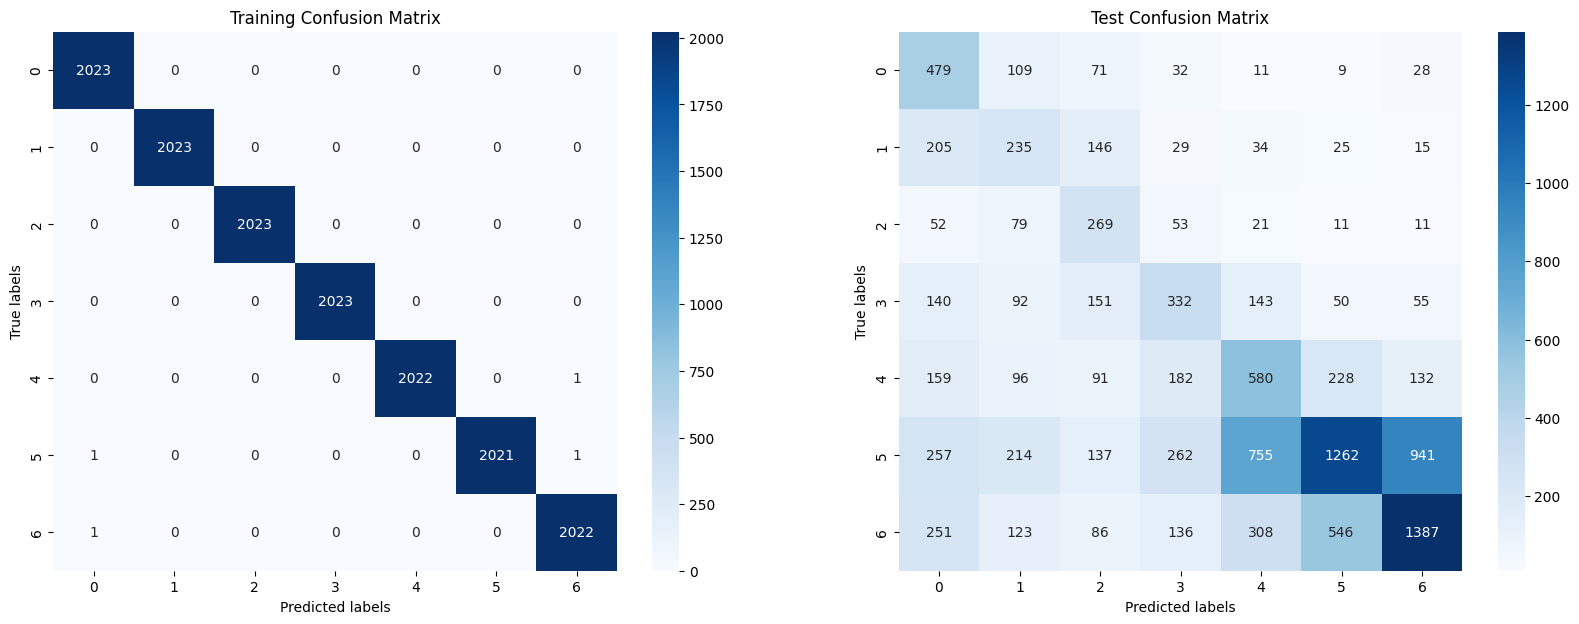

In [136]:
from sklearn.metrics import classification_report

# Print the best parameters, the test accuracy, and the classification report
print(f"Best Parameters: {grid_search_rf.best_params_}")
print(f"Test Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(classification_report(test_target_encoded, y_pred_rf))

# draw confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# train confusion matrix
cm_train = confusion_matrix(train_target_encoded, grid_search_rf.predict(X_train))

# test confusion matrix
cm_test = confusion_matrix(test_target_encoded, y_pred_rf)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 7))  # 1 Row, 2 Columns

# Test Confusion Matrix
sns.heatmap(cm_test, annot=True, fmt='g', cmap='Blues', ax=ax2,
            xticklabels=sorted(set(test_target_encoded)), yticklabels=sorted(set(test_target_encoded)))
ax2.set_xlabel('Predicted labels')
ax2.set_ylabel('True labels')
ax2.set_title('Test Confusion Matrix')

# Training Confusion Matrix
sns.heatmap(cm_train, annot=True, fmt='g', cmap='Blues', ax=ax1,
            xticklabels=sorted(set(train_target_encoded)), yticklabels=sorted(set(train_target_encoded)))
ax1.set_xlabel('Predicted labels')
ax1.set_ylabel('True labels')
ax1.set_title('Training Confusion Matrix')


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# important features
feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns.tolist()

# Rename 'duration_ms' to 'Song duration' and capitalize the rest
feature_names = ['Song duration' if f == 'duration_ms' else f.capitalize() for f in feature_names]

# Sorting the feature importances
sorted_idx = np.argsort(feature_importances)

# Creating a color gradient from dark green to light green
cmap = LinearSegmentedColormap.from_list("custom_gradient", ["darkgreen", "lightgreen"], N=256)
colors = [cmap(i) for i in np.linspace(1, 0, len(sorted_idx))]


plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

# set X and Y axis line to be black
# plt.rcParams['axes.edgecolor'] = 'black'

# Plot
plt.figure(figsize=(10, 8), dpi=500)
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], color=colors, edgecolor='k')
plt.yticks(range(len(sorted_idx)), np.array(feature_names)[sorted_idx])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tight_layout()


plt.xlabel('Relative Importance')
plt.title('Feature Importances in Random Forest Classifier')
# save the plot with dpi 500
plt.savefig('../images/feature_importances_random_forest.png', dpi=500)
plt.show()


## XGBoost 

In [137]:
# Encode categorical 'genre' for both training and testing sets
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Change the key and major columns to numerical for input
X_train['key'] = X_train['key'].astype('int')
X_train['major'] = X_train['major'].astype('int')
X_test['key'] = X_test['key'].astype('int')
X_test['major'] = X_test['major'].astype('int')


In [138]:
import xgboost as xgb

# Setting up the XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='multi:softprob',  # Use for multi-class classification
    num_class=len(label_encoder.classes_),  # Specify number of classes
    random_state=137
)

# Training the model
model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [139]:
from sklearn.metrics import accuracy_score, classification_report

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.4073502722323049
Classification Report:
               precision    recall  f1-score   support

           0       0.32      0.63      0.42       739
           1       0.25      0.36      0.29       689
           2       0.29      0.52      0.37       496
           3       0.32      0.35      0.34       963
           4       0.30      0.37      0.33      1468
           5       0.58      0.33      0.42      3828
           6       0.53      0.48      0.50      2837

    accuracy                           0.41     11020
   macro avg       0.37      0.43      0.38     11020
weighted avg       0.45      0.41      0.41     11020



In [140]:
from sklearn.model_selection import GridSearchCV

# Setting up the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Configuring the grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=3, verbose=2)

# Running grid search
grid_search.fit(X_train, y_train)

# Best parameters and best score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=50; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200; total time=   0.6s
[CV] END learning_rate=0.01, max_depth=3, min_chil

In [141]:
# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Making predictions on the test set
y_test_pred = best_model.predict(X_test)

# Evaluating the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_classification_report = classification_report(y_test, y_test_pred)

# Print the results
print("Test Set Accuracy:", test_accuracy)
print("Test Set Classification Report:\n", test_classification_report)

Test Set Accuracy: 0.41206896551724137
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.34      0.60      0.43       739
           1       0.28      0.39      0.32       689
           2       0.29      0.52      0.37       496
           3       0.32      0.39      0.35       963
           4       0.29      0.36      0.32      1468
           5       0.56      0.35      0.43      3828
           6       0.54      0.47      0.50      2837

    accuracy                           0.41     11020
   macro avg       0.37      0.44      0.39     11020
weighted avg       0.45      0.41      0.42     11020



## Comparison of the models -> not inc. 1950s

7 classes -> 

- Logistic Regression
    - Test Accuracy: 0.31887477313974594
    - Time: 4m 53.5s
- SVM
    - Test Accuracy: 0.33212341197822143
    - Time: 54m 45.9s
- Neural Network
    - Train Accuracy: 0.365863
    - Test Accuracy: 0.2531760334968567
    - Time: 17-ish min
- Random Forest
    - Test Accuracy: 0.41234119782214157
    - Time: 38m 36.4s
- XGBoost
    - Test Accuracy: 0.41206896551724137
    - Time: 3m 5.6s